# Introduction

The purpose of this project is to examine crime data in Los Angeles. The data comes from the lacity's website. The dataset reflects incidents of crime in the City of Los Angeles dating back to 2010. The dataset is available via API.

In [44]:
#Import relevant packages
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Call API and investigate the structure
r = requests.get('https://data.lacity.org/resource/7fvc-faax.json')
json_data = r.json()
print(type(json_data))
print((json_data[0]))

<class 'list'>
{':@computed_region_2dna_qi2s': '76', ':@computed_region_k96s_3jcv': '694', ':@computed_region_kqwf_mjcx': '9', ':@computed_region_qz3q_ghft': '23076', ':@computed_region_tatf_ua23': '1220', ':@computed_region_ur2y_g4cx': '7', 'area_id': '01', 'area_name': 'Central', 'crm_cd': '740', 'crm_cd_1': '740', 'crm_cd_desc': 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114', 'date_occ': '2017-11-02T00:00:00.000', 'date_rptd': '2017-11-02T00:00:00.000', 'dr_no': '170101261', 'location': '1800 S  BROADWAY', 'location_1': {'type': 'Point', 'coordinates': [-118.2647, 34.0328]}, 'mocodes': '0329 2004', 'premis_cd': '203', 'premis_desc': 'OTHER BUSINESS', 'rpt_dist_no': '0195', 'status': 'IC', 'status_desc': 'Invest Cont', 'time_occ': '2130', 'vict_age': '58', 'vict_descent': 'H', 'vict_sex': 'M'}


In [45]:
#Convert list of dictionaries into a pandas dataframe
crime_df = pd.DataFrame(json_data)
print(crime_df.head())

  :@computed_region_2dna_qi2s :@computed_region_k96s_3jcv  \
0                          76                         694   
1                         NaN                         532   
2                          28                         533   
3                          28                         536   
4                          76                         537   

  :@computed_region_kqwf_mjcx :@computed_region_qz3q_ghft  \
0                           9                       23076   
1                           9                       22728   
2                           9                       22728   
3                           9                       23074   
4                           9                       23074   

  :@computed_region_tatf_ua23 :@computed_region_ur2y_g4cx area_id area_name  \
0                        1220                           7      01   Central   
1                        1322                         NaN      01   Central   
2                         466

In [4]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
:@computed_region_2dna_qi2s    970 non-null object
:@computed_region_k96s_3jcv    989 non-null object
:@computed_region_kqwf_mjcx    997 non-null object
:@computed_region_qz3q_ghft    1000 non-null object
:@computed_region_tatf_ua23    998 non-null object
:@computed_region_ur2y_g4cx    292 non-null object
area_id                        1000 non-null object
area_name                      1000 non-null object
crm_cd                         1000 non-null object
crm_cd_1                       1000 non-null object
crm_cd_2                       63 non-null object
crm_cd_3                       1 non-null object
crm_cd_4                       1 non-null object
crm_cd_desc                    1000 non-null object
cross_street                   185 non-null object
date_occ                       1000 non-null object
date_rptd                      1000 non-null object
dr_no                   

In [9]:
#Drop columns with more than 70% of the data missing and coding columns
crime_df= crime_df[[column for column in crime_df if crime_df[column].count() / len(crime_df) >= 0.3]]
crime_df = crime_df.drop([':@computed_region_2dna_qi2s', ':@computed_region_k96s_3jcv', ':@computed_region_kqwf_mjcx', ':@computed_region_qz3q_ghft', ':@computed_region_tatf_ua23'],1)
crime_df = crime_df.drop(['crm_cd_1'], 1)
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
area_id           1000 non-null object
area_name         1000 non-null object
crm_cd            1000 non-null object
crm_cd_desc       1000 non-null object
date_occ          1000 non-null object
date_rptd         1000 non-null object
dr_no             1000 non-null object
location          1000 non-null object
location_1        1000 non-null object
mocodes           873 non-null object
premis_cd         1000 non-null object
premis_desc       993 non-null object
rpt_dist_no       1000 non-null object
status            1000 non-null object
status_desc       1000 non-null object
time_occ          1000 non-null object
vict_age          940 non-null object
vict_descent      884 non-null object
vict_sex          884 non-null object
weapon_desc       337 non-null object
weapon_used_cd    337 non-null object
dtypes: object(21)
memory usage: 164.1+ KB


In [10]:
print(crime_df.head())

  area_id area_name crm_cd                                        crm_cd_desc  \
0      01   Central    740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   
1      01   Central    888                                        TRESPASSING   
2      01   Central    330                              BURGLARY FROM VEHICLE   
3      01   Central    330                              BURGLARY FROM VEHICLE   
4      01   Central    745           VANDALISM - MISDEAMEANOR ($399 OR UNDER)   

                  date_occ                date_rptd      dr_no  \
0  2017-11-02T00:00:00.000  2017-11-02T00:00:00.000  170101261   
1  2017-10-30T00:00:00.000  2017-10-30T00:00:00.000  170128267   
2  2017-11-01T00:00:00.000  2017-11-01T00:00:00.000  170128444   
3  2017-11-01T00:00:00.000  2017-11-01T00:00:00.000  170128445   
4  2017-11-02T00:00:00.000  2017-11-02T00:00:00.000  170128448   

                                 location  \
0                        1800 S  BROADWAY   
1         LOS ANGELES     

In [13]:
#To begin I would like to see the different types of crime
crime_df.groupby('crm_cd_desc').area_name.count().sort_values(ascending=False).head(10)

crm_cd_desc
THEFT OF IDENTITY                                               90
VEHICLE - STOLEN                                                87
INTIMATE PARTNER - SIMPLE ASSAULT                               87
BURGLARY FROM VEHICLE                                           70
BATTERY - SIMPLE ASSAULT                                        68
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114    62
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                  56
THEFT PLAIN - PETTY ($950 & UNDER)                              50
CRIMINAL THREATS - NO WEAPON DISPLAYED                          49
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                        47
Name: area_name, dtype: int64

{'01': 'Central', '02': 'Rampart', '03': 'Southwest', '19': 'Mission', '04': 'Hollenbeck', '05': 'Harbor', '06': 'Hollywood', '07': 'Wilshire', '08': 'West LA', '09': 'Van Nuys', '10': 'West Valley', '11': 'Northeast', '12': '77th Street', '13': 'Newton', '14': 'Pacific', '15': 'N Hollywood', '16': 'Foothill', '17': 'Devonshire', '18': 'Southeast', '20': 'Olympic', '21': 'Topanga'}


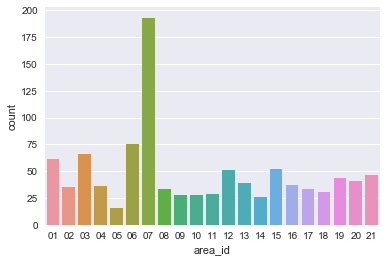

In [14]:
#Investigate where crimes are more likely to occur
area_ids = crime_df.area_id.unique()
area_names = crime_df.area_name.unique()
area_dict = dict(zip(area_ids, area_names))
print(area_dict)
sns.set(style="darkgrid")
ax = sns.countplot(x='area_id', data = crime_df)

Area 7 has the highest number of crimes by far. Looking at the dictionary we see that area 7 corresponds to the area name Wilshire. Wilshire is a prominent boulevard that goes east and west through Los Angeles. It seems that the area name Wilshire corresponds to crimes that occur at or near this major street. Wilshire is a major hub for transportation with many buses and subways that run along it. This combined with the fact that many people live along this street contribute to the fact that many crimes occur here.
Other noteworthy high crime counts are Hollywood, Southwest, and Central.
The lowest crime count corresponds with the area Harbor

I believe these crime counts are heavily influenced by the population density of each area

In [21]:
#Fill Premis Descriptions for which their is already a description assigned to a code
premise_codes = crime_df.premis_cd.unique()
premise = crime_df.premis_desc.unique()
premise_dict = dict(zip(premise_codes, premise))
crime_df.premis_desc = crime_df.premis_desc.fillna(crime_df.premis_cd.map(premise_dict))
print(crime_df[crime_df['premis_desc'].isnull()]['premis_cd'])
print(premise_dict['516'])

6    516
Name: premis_cd, dtype: object
nan


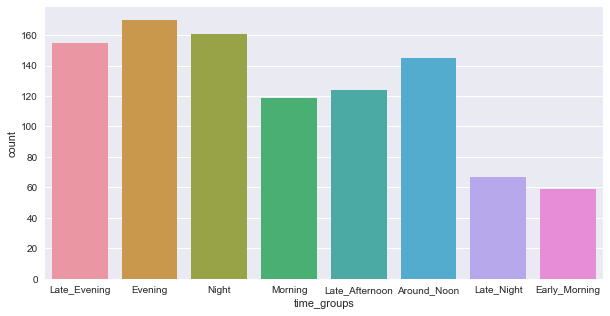

In [36]:
#Put the time crimes occur into buckets
crime_df['time'] = pd.to_numeric(crime_df['time_occ'])
def label_time(row):
    if 500 <= row < 800:
        return 'Early_Morning'
    elif 800 <= row < 1100:
        return 'Morning'
    elif 1100 <= row < 1400:
        return 'Around_Noon'
    elif 1400 <= row < 1700:
        return 'Late_Afternoon'
    elif 1700 <= row < 2000:
        return 'Evening'
    elif 2000 <= row < 2300:
        return 'Late_Evening'
    elif 2300 <= row <= 2400 or 0 <= row < 200:
        return 'Night'
    elif 200 <= row < 500:
        return 'Late_Night'
    else:
        return 'Other'
crime_df['time_groups'] = crime_df['time'].apply(label_time)
plt.figure(figsize=(10,5))
axis = sns.countplot(x = 'time_groups', data = crime_df)

In [37]:
#Convert age to numerics and see the description of the age column
crime_df['age'] = pd.to_numeric(crime_df['vict_age'])
print(crime_df['age'].describe())

count    940.000000
mean      35.012766
std       15.934833
min       10.000000
25%       22.000000
50%       32.000000
75%       46.000000
max       94.000000
Name: age, dtype: float64


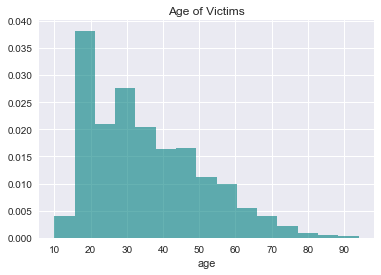

In [38]:
#Examine the distribution of age for victims
plt.xlabel('age')
plt.title('Age of Victims')
plt.xticks(range(0, 100, 10))
plt.hist(crime_df['age'].dropna(), bins=15, density = True, stacked = True, color = 'teal', alpha = .6)
plt.show()

From this histogram we can see that the portion of the population that are the most victimized are teenagers and the risk of victimization appears to drop as individuals get older.

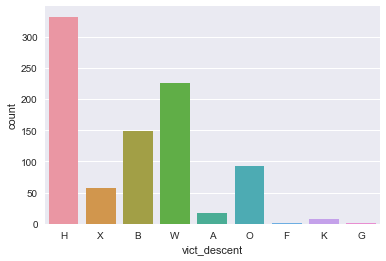

In [39]:
sns.countplot(x='vict_descent', data = crime_df)

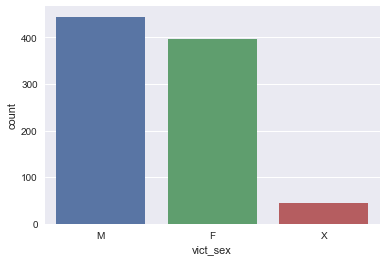

In [40]:
sns.countplot(x='vict_sex', data = crime_df)

Victims are more likely to be hispanic, white, or black. The counts of male and female victims are roughly equal with there being slightly more males.